In [1]:
#import Libraries
import numpy as np
import pandas as pd
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
tweets=pd.read_csv("C:\\Users\\prasa\\Downloads\\Elon_musk.csv" ,error_bad_lines=False)
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
"      ".strip()

''

# Text Preprocessing

In [6]:
tweets = [Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets = [Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:5]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [9]:
# Joining the list into one string/text
tweets_text = ' '.join(tweets)
tweets_text

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [10]:
#Punctuation
no_punc_text = tweets_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [22]:
#Tokenization
from nltk.tokenize import TweetTokenizer
tokens = TweetTokenizer(strip_handles=True)
tweet_tokens = tokens.tokenize(no_punc_text) #removes twitter username handles
print(tweet_tokens[0:50])  #displaying first 50 usernames involved

['kunalb', '11', 'I', '�', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', '27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of']


In [21]:
len(tweet_tokens)

23119

In [25]:
# remove http or any url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won�t give you your private keys should be avoid

In [28]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in tweet_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

['kunalb', '11', 'I', '�', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', '27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco', '9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx', '10']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['kunalb', '11', 'i', '�', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera', '27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', '10']


In [32]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['kunalb', '11', 'i', '�', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', '27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx', '10']


In [38]:
! python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [42]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [43]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:50])

kunalb 11 I � alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera 27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco 9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx 10


In [44]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['kunalb', '11', '-PRON-', '�', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera', '27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco', '9wfkmyu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', '-PRON-', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx', '10']


In [60]:
final_tweets=' '.join(lemmas)
final_tweets

'kunalb 11 -PRON- � alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera 27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco 9wfkmyu2oj Frodo underdoge all thought would fail -PRON- httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx 10 Haha thank flcnhvy anonyx 10 indeed Tweets definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyew httpstco 3rwe9uhsts geoffkeighley UnrealEngine -PRON- � get real buy dogecoin lil x toddler hodler JoshManMode -PRON- definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account AstroJordy U0001F923U0001F923 this true power haha httpstcoFc 9uhqsd7o freewalletorg any crypto wallet � give private key avoid cost freewalletorg -PRON- app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar Gateway together one missi

# Feature Extraction

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'kunalb': 3105, '11': 77, 'pron': 3943, 'alien': 807, 'idaacarmack': 2849, 'ray': 4024, 'trace': 4891, 'cyberpunk': 1540, 'hdr': 2256, 'nextlevel': 3553, 'have': 2250, 'try': 4927, 'joerogan': 3026, 'spotify': 4513, 'great': 2189, 'interview': 2957, 'gtera': 2207, '27': 197, 'doge': 1692, 'underestimate': 5058, 'teslacn': 4740, 'congratulations': 1435, 'tesla': 4734, 'china': 1318, 'amazing': 832, 'execution': 1904, 'last': 3125, 'year': 5329, 'now': 3594, 'next': 3552, 'even': 1876, 'happy': 2236, 'new': 3549, 'ox': 3711, 'httpstco': 2340, '9wfkmyu2oj': 691, 'frodo': 2077, 'underdoge': 5057, 'all': 809, 'thought': 4817, 'would': 5304, 'fail': 1940, 'httpstcozgxjfdzzrm': 2808, 'owensparks': 3708, 'flcnhvy': 2018, 'anonyx': 861, '10': 69, 'haha': 2222, 'thank': 4777, 'indeed': 2898, 'tweets': 4948, 'definitely': 1594, 'represent': 4104, 'realworld': 4047, 'time': 4834, 'allocation': 811, 'the': 4785, 'entertaining': 1831, 'outcome': 3688, 'likely': 3186, 'givedirectly': 2161, 'just': 3

In [53]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['0rd', '0rg2qoaf', '0rm', '0rv0yq5q', '0s0ybscm0p', '0sjit', '0snf4ugyk', '0srlfg03fg', '0sz9cbzg', '0t2', '0thlr48n', '0v9gi47', '0vas3cck9p', '0vdefyc', '0wnuin', '0wwqstaxm', '0y5fkvqpk8', '0yo4jkbs2', '0yrjobe', '10', '100', '1000', '10000', '1028', '107', '10phoenix', '10x', '11', '112', '117', '11742', '11nikql', '11thhour', '12', '122', '12iq', '13', '13031925', '130pm', '13arm13arm', '13ericralph31', '14', '140pm', '147', '149watt', '14fozdo8', '14pksayi', '14yearold', '15', '150']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
print(X.toarray().shape)

(17417, 5359)


#  CountVectorizer( Bigrams & Trigrams)

In [55]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [56]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['45', 'actually', 'ajtourville', 'also', 'amp', 'austinbarnard', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'engineersfeed', 'ercxspace', 'erdayastronaut', 'evafoxu', 'even', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'httpstco', 'idaacarmack', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'pron', 'rationaletienne', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'thesheetztweetz', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'week', 'well', 'wholemarsblog', 'will', 'work'

# TFidf vectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '11', '11742', '13', '13031925', '15', '20', '247', '28delayslater', '30', '305', '3d', '3owners', '45', '60', '74', '85', '8p', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'benmezrich', 'berlin', 'berniesanders', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'curevac', 'cyberpunkgame', 'cybertruck', 'datum

# Generate wordcloud

In [58]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

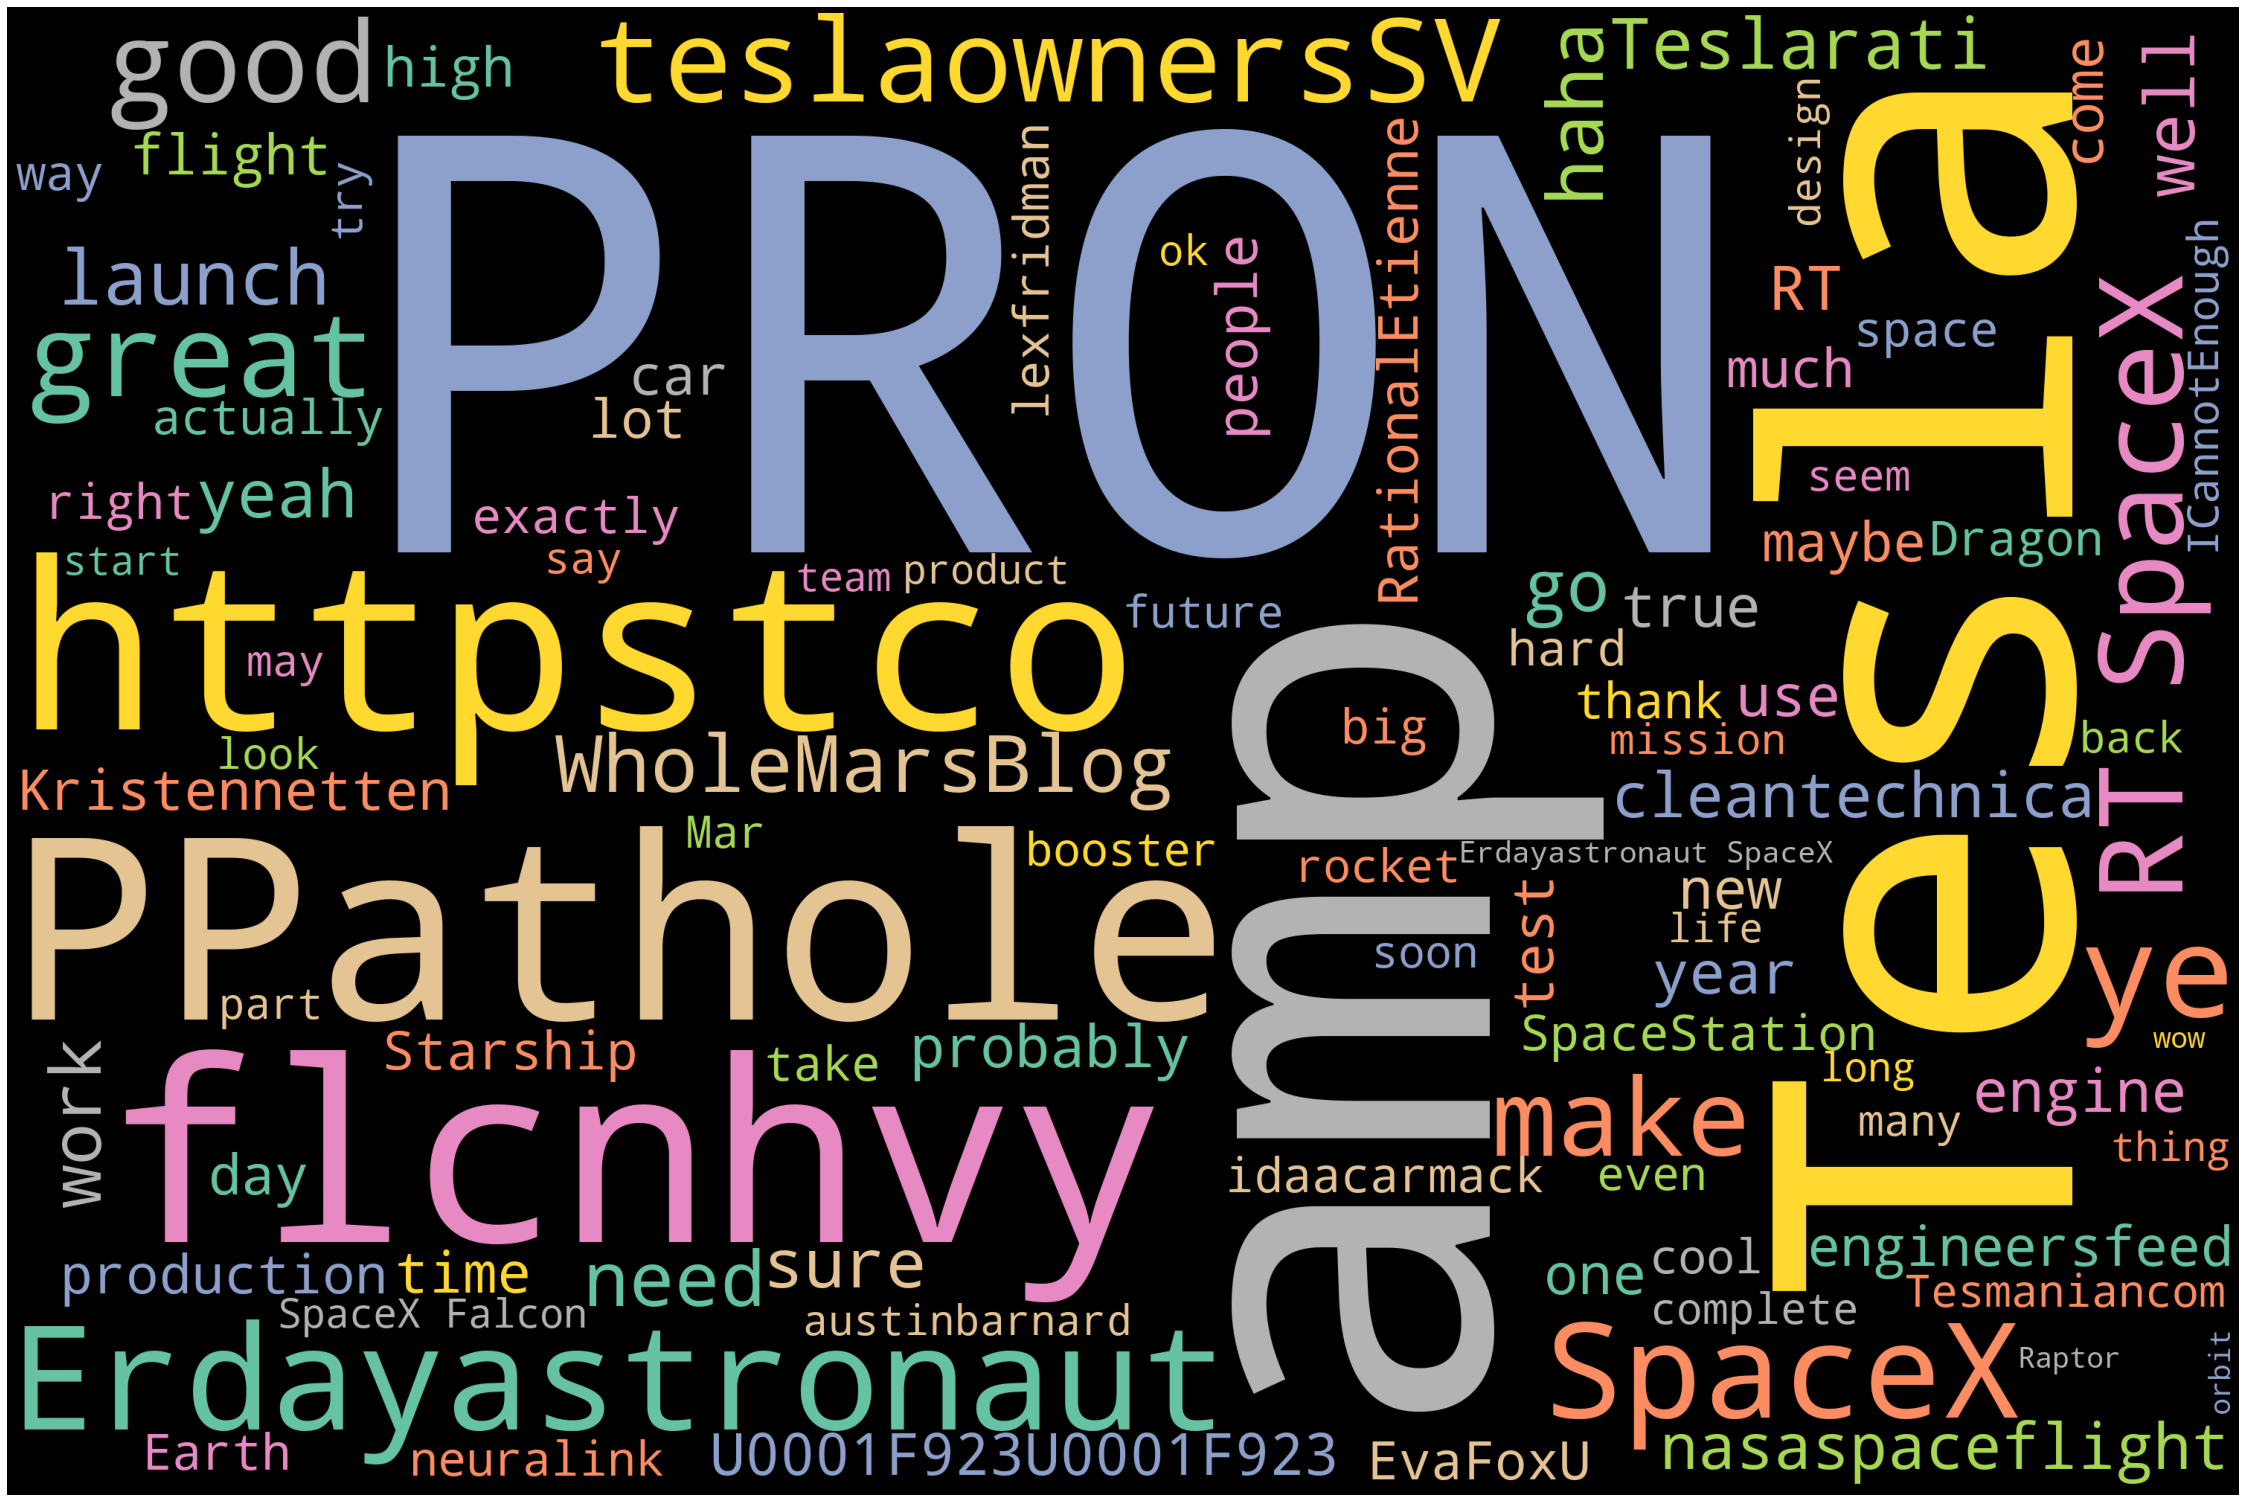

In [61]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(final_tweets)
# Plot
plot_cloud(wordcloud)

# Named Entity Recognition

In [62]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")
one_block = final_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [63]:
all_ents=[]
for word in doc_block.ents:
    
    all_ents.append(word.label_)
set(all_ents)    

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [66]:
doc_block = nlp(one_block)
for token in doc_block[:]:
    print(token,"==>", token.pos_)

kunalb ==> PROPN
11 ==> NUM
-PRON- ==> PROPN
� ==> PROPN
alien ==> PROPN
IDAACarmack ==> PROPN
Ray ==> PROPN
trace ==> NOUN
Cyberpunk ==> PROPN
HDR ==> PROPN
nextlevel ==> NOUN
have ==> AUX
try ==> VERB
joerogan ==> PROPN
spotify ==> VERB
great ==> ADJ
interview ==> NOUN
gtera ==> PROPN
27 ==> NUM
Doge ==> PROPN
underestimate ==> ADJ
teslacn ==> NOUN
Congratulations ==> NOUN
Tesla ==> PROPN
China ==> PROPN
amazing ==> ADJ
execution ==> NOUN
last ==> ADJ
year ==> NOUN
now ==> ADV
next ==> ADV
even ==> ADV
Happy ==> PROPN
New ==> PROPN
Year ==> PROPN
Ox ==> PROPN
httpstco ==> PROPN
9wfkmyu2oj ==> NUM
Frodo ==> PROPN
underdoge ==> NOUN
all ==> DET
thought ==> NOUN
would ==> VERB
fail ==> VERB
-PRON- ==> PUNCT
httpstcozGxJFDzzrM ==> PUNCT
OwenSparks ==> PROPN
flcnhvy ==> VERB
anonyx ==> VERB
10 ==> NUM
Haha ==> PROPN
thank ==> VERB
flcnhvy ==> PROPN
anonyx ==> VERB
10 ==> NUM
indeed ==> ADV
Tweets ==> PROPN
definitely ==> ADV
represent ==> VERB
realworld ==> NOUN
time ==> NOUN
allocation =

9 ==> NUM
launch ==> NOUN
60 ==> NUM
Starlink ==> PROPN
satellite ==> NOUN
U2192 ==> PROPN
httpstcobJFjLCzWdK ==> PROPN
httpstcoln ==> PROPN
95reesbw ==> NOUN
Off ==> PROPN
Twitter ==> PROPN
-PRON- ==> PUNCT
fill ==> VERB
graffiti ==> PROPN
art ==> NOUN
eiraum ==> NOUN
U043CU044B ==> PROPN
U0441U0434U0435U043BU0430U0435U043C ==> PROPN
Giga ==> PROPN
Berlin ==> PROPN
progress ==> NOUN
httpstcoekpG ==> PROPN
5qcbui ==> NUM
hamoon ==> NOUN
neuralink ==> NOUN
Neuralink ==> PROPN
work ==> VERB
super ==> ADV
hard ==> ADV
ensure ==> VERB
implant ==> ADJ
safety ==> NOUN
amp ==> VERB
close ==> ADJ
communication ==> NOUN
� ==> NOUN
httpstcoYky ==> PROPN
1llpumd ==> NUM
RT ==> PROPN
SpaceX ==> PROPN
this ==> DET
mission ==> NOUN
enable ==> VERB
access ==> NOUN
everyday ==> ADJ
people ==> NOUN
dream ==> VERB
go ==> VERB
space ==> NOUN
RT ==> PROPN
SpaceX ==> PROPN
announce ==> NOUN
first ==> ADJ
commercial ==> ADJ
astronaut ==> NOUN
mission ==> NOUN
orbit ==> NOUN
Earth ==> PROPN
aboard ==> ADP
Dr

� ==> PROPN
httpstcosNiGKxdXFP ==> PROPN
nextspaceflight ==> PROPN
-PRON- ==> PUNCT
� ==> NOUN
hope ==> VERB
FAA ==> PROPN
approval ==> NOUN
test ==> NOUN
flight ==> NOUN
tomorrow ==> NOUN
afternoon ==> NOUN
WholeMarsBlog ==> VERB
the ==> DET
entire ==> ADJ
� ==> PROPN
stack ==> PROPN
� ==> PROPN
datum ==> PROPN
collection ==> NOUN
label ==> NOUN
amp ==> NOUN
inference ==> NOUN
surround ==> NOUN
video ==> NOUN
Th ==> PROPN
� ==> NOUN
httpstcou ==> PROPN
90sqjkn8u ==> PROPN
flcnhvy ==> PROPN
wholemarsblog ==> NOUN
yes ==> INTJ
although ==> SCONJ
crazy ==> ADJ
turn ==> NOUN
FSD ==> PROPN
WholeMarsBlog ==> PUNCT
Tesla ==> PROPN
steadily ==> ADV
move ==> VERB
nns ==> PROPN
8 ==> NUM
camera ==> NOUN
surround ==> NOUN
video ==> NOUN
this ==> DET
enable ==> VERB
superhuman ==> NOUN
selfdriving ==> VERB
naval ==> ADV
some ==> DET
tyranny ==> NOUN
also ==> ADV
road ==> NOUN
hell ==> NOUN
mostly ==> ADV
pave ==> VERB
bad ==> ADJ
intention ==> NOUN
levine ==> NOUN
Catchy ==> PROPN
httpstcoAu ==> 

steal ==> VERB
namelogos ==> PROPN
amp ==> NOUN
probably ==> ADV
� ==> PROPN
sue ==> PROPN
arstechnica ==> PROPN
SciGuySpace ==> PROPN
-PRON- ==> PUNCT
� ==> PROPN
try ==> VERB
get ==> AUX
people ==> NOUN
Mars ==> PROPN
Help ==> PROPN
would ==> VERB
appreciate ==> VERB
SpaceX ==> PRON
SpaceStation ==> PROPN
one ==> NUM
day ==> NOUN
get ==> AUX
camera ==> NOUN
also ==> ADV
show ==> VERB
star ==> PROPN
field ==> NOUN
background ==> NOUN
RT ==> PROPN
SpaceX ==> PROPN
Separation ==> NOUN
confirm ==> VERB
Dragon ==> PROPN
perform ==> VERB
3 ==> NUM
departure ==> NOUN
burn ==> ADJ
move ==> NOUN
away ==> ADV
SpaceStation ==> PROPN
httpstcoG ==> PROPN
27ohwvnxj ==> VERB
lexfridman ==> ADJ
Suicide ==> PROPN
double ==> ADJ
homicide ==> NOUN
httpstcoMvWGPs ==> PROPN
9uqe ==> NUM
lexfridman ==> NOUN
absolutely ==> ADV
hey ==> INTJ
� ==> NOUN
yeah ==> INTJ
Queen ==> PROPN
� ==> NOUN
-PRON- ==> PUNCT
� ==> NOUN
go ==> VERB
to ==> PART
make ==> VERB
u0001f495u0001f495 ==> ADJ
httpstcolrqdirbiyd ==> N

yes ==> INTJ
flcnhvy ==> PROPN
ErcXspace ==> PROPN
Saves ==> PROPN
mass ==> VERB
amp ==> NOUN
cost ==> NOUN
leg ==> NOUN
amp ==> NOUN
enable ==> VERB
immediate ==> ADJ
reposition ==> NOUN
booster ==> NOUN
launch ==> NOUN
mount ==> PROPN
� ==> PROPN
rea ==> PROPN
� ==> PROPN
httpstcojwDCjArymJ ==> PROPN
ErcXspace ==> PROPN
-PRON- ==> PUNCT
� ==> PROPN
go ==> VERB
try ==> VERB
catch ==> VERB
Super ==> PROPN
Heavy ==> PROPN
Booster ==> PROPN
launch ==> NOUN
tower ==> NOUN
arm ==> NOUN
use ==> VERB
grid ==> NOUN
fin ==> NOUN
take ==> VERB
load ==> NOUN
snakehead ==> NOUN
dog ==> NOUN
undivided ==> ADJ
attention ==> NOUN
winderhead ==> NOUN
ostrich ==> DET
come ==> VERB
glide ==> NOUN
nonchalant ==> ADJ
httpstcodtpmdm ==> NOUN
3tqp ==> NUM
Tesmaniancom ==> PROPN
seem ==> VERB
odd ==> ADJ
opposition ==> NOUN
group ==> NOUN
BMW ==> PROPN
� ==> PROPN
home ==> NOUN
state ==> NOUN
Baveria ==> PROPN
that ==> DET
� ==> VERB
far ==> ADV
Brande ==> PROPN
� ==> NOUN
httpstcoM ==> PROPN
7dyvli4cx ==> 

heydave ==> NOUN
7 ==> NUM
good ==> ADJ
idea ==> NOUN
wintonARK ==> PROPN
during ==> ADP
darkest ==> PROPN
day ==> NOUN
model ==> NOUN
3 ==> NUM
program ==> NOUN
-PRON- ==> PUNCT
reach ==> NOUN
Tim ==> PROPN
Cook ==> PROPN
discuss ==> VERB
possibility ==> NOUN
� ==> NOUN
httpstcoopTz ==> PROPN
9urne0 ==> NUM
wintonARK ==> PROPN
strange ==> ADJ
true ==> ADJ
Tesla ==> PROPN
already ==> ADV
use ==> VERB
ironphosphate ==> NOUN
medium ==> ADJ
range ==> NOUN
car ==> NOUN
make ==> VERB
Shanghai ==> PROPN
facto ==> X
� ==> PROPN
httpstcoMIlWSilvRT ==> PROPN
archillect ==> PROPN
Sparta ==> PROPN
� ==> PROPN
reply ==> NOUN
Macedon ==> PROPN
LizClaman ==> PROPN
Tesla ==> PROPN
FoxBusiness ==> PROPN
ClamanCountdown ==> PROPN
Hi ==> PROPN
Liz ==> PROPN
thank ==> VERB
everyone ==> PRON
work ==> NOUN
hard ==> ADV
make ==> VERB
Tesla ==> PROPN
successful ==> ADJ
-PRON- ==> PUNCT
heart ==> NOUN
go ==> VERB
teslaownerssv ==> NOUN
indeed ==> ADV
Kristennetten ==> PROPN
-PRON- ==> PUNCT
seriously ==> ADV


CrewDragon ==> PROPN
� ==> NOUN
SpaceStation ==> PROPN
SpaceX ==> PROPN
Wow ==> INTJ
Station ==> PROPN
look ==> VERB
amazing ==> ADJ
RT ==> PROPN
NASA ==> PROPN
Good ==> PROPN
morning ==> NOUN
earthling ==> VERB
u2600ufe0f ==> VERB
the ==> DET
journey ==> NOUN
continue ==> VERB
watch ==> VERB
NASA ==> PROPN
SpaceX ==> PROPN
cargo ==> NOUN
resupply ==> ADV
mission ==> NOUN
dock ==> NOUN
SpaceStatio ==> PROPN
� ==> NOUN
nasaspaceflight ==> NOUN
Knock ==> PROPN
knock ==> VERB
singe ==> PROPN
telegram ==> PROPN
lexfridman ==> PROPN
carry ==> VERB
even ==> ADV
symbiotic ==> ADJ
bacteria ==> NOUN
40 ==> NUM
trillion ==> NUM
cell ==> NOUN
AdamKlotz ==> PROPN
lexfridman ==> NOUN
yes ==> INTJ
lexfridman ==> ADJ
-PRON- ==> PUNCT
mobile ==> ADJ
cell ==> NOUN
colony ==> NOUN
100 ==> NUM
RT ==> PROPN
SpaceX ==> PROPN
Tracking ==> PROPN
footage ==> NOUN
helicopter ==> NOUN
today ==> NOUN
� ==> NOUN
Falcon ==> PROPN
9 ==> NUM
launch ==> VERB
lc39a ==> NOUN
httpstco ==> PROPN
7rYVZRTS18 ==> PROPN
RT =

0001F62C ==> PROPN
RationalEtienne ==> PROPN
ShyCybertruck ==> PROPN
Fate ==> PROPN
love ==> NOUN
irony ==> NOUN
hate ==> NOUN
hypocrisy ==> NOUN
RT ==> PROPN
NASA ==> PROPN
Booster ==> PROPN
separation ==> NOUN
secondengine ==> NOUN
start ==> VERB
fair ==> ADJ
separation ==> NOUN
USEuropean ==> PROPN
Sentinel ==> PROPN
6 ==> NUM
Michael ==> PROPN
Freilich ==> PROPN
oceanobserving ==> ADP
� ==> PROPN
ICannotEnough ==> VERB
heydave ==> VERB
7 ==> NUM
yes ==> INTJ
U0001F603 ==> PROPN
flcnhvy ==> NOUN
-PRON- ==> PUNCT
datum ==> ADJ
center ==> NOUN
name ==> NOUN
Skynet ==> PROPN
joke ==> NOUN
10 ==> NUM
year ==> NOUN
ago ==> ADV
Might ==> PROPN
tempting ==> ADJ
fate ==> NOUN
heydave ==> VERB
7 ==> NUM
philwhln ==> NOUN
Tesla ==> PROPN
vehicle ==> NOUN
create ==> VERB
amp ==> NOUN
produce ==> VERB
many ==> ADJ
useful ==> ADJ
product ==> NOUN
nasaspaceflight ==> ADJ
large ==> ADJ
cast ==> NOUN
titanium ==> NOUN
part ==> NOUN
world ==> NOUN
no ==> DET
heat ==> NOUN
shield ==> NOUN
need ==> VE

-PRON- ==> PUNCT
count ==> NOUN
atom ==> NOUN
point ==> NOUN
djsnm ==> NOUN
Erdayastronaut ==> PROPN
CharlesNOtrumps ==> PROPN
rweb ==> NOUN
11742 ==> NUM
absolutely ==> ADV
productionteste ==> VERB
rocket ==> NOUN
engine ==> NOUN
90 ==> NUM
� ==> NOUN
httpstcotv ==> VERB
3pixzp4i ==> NOUN
Erdayastronaut ==> PROPN
CharlesNOtrumps ==> PROPN
rweb ==> NOUN
11742 ==> NUM
-PRON- ==> PUNCT
first ==> ADJ
Merlin ==> PROPN
engine ==> NOUN
design ==> NOUN
really ==> ADV
bad ==> ADJ
tbh ==> INTJ
nothing ==> PRON
work ==> NOUN
well ==> ADV
� ==> PROPN
httpstcoY ==> PROPN
5njREPvtc ==> PROPN
billhuang ==> PROPN
688 ==> NUM
JohnnaCrider ==> PROPN
1 ==> NUM
timmerenginerd ==> NOUN
jack ==> PROPN
maybe ==> ADV
-PRON- ==> PUNCT
love ==> NOUN
irony ==> NOUN
haha ==> NOUN
GreenIsClutch ==> PROPN
JohnnaCrider ==> PROPN
1 ==> NUM
timmerenginerd ==> NOUN
jack ==> PROPN
-PRON- ==> PUNCT
� ==> NOUN
way ==> NOUN
hopefully ==> ADV
Teslaquila ==> PROPN
next ==> ADJ
month ==> NOUN
chrisgnsf ==> NOUN
special ==> A

read ==> VERB
case ==> NOUN
close ==> ADJ
httpstcopuyijcadd ==> NOUN
6 ==> NUM
soon ==> ADV
httpstcomWOpR ==> NOUN
7w8kk ==> NUM
PPathole ==> PROPN
Fwiw ==> PROPN
lab ==> NOUN
-PRON- ==> PUNCT
speak ==> VERB
think ==> VERB
30 ==> NUM
accurate ==> ADJ
30 ==> NUM
40 ==> NUM
get ==> VERB
dicey ==> NOUN
amp ==> PROPN
40 ==> NUM
bs ==> NOUN
Will ==> VERB
talk ==> VERB
� ==> NOUN
httpstcoK ==> PROPN
77wXQ11yt ==> PROPN
Lab ==> PROPN
-PRON- ==> PUNCT
speak ==> NOUN
say ==> VERB
cov ==> PROPN
2 ==> NUM
PCR ==> PROPN
detection ==> NOUN
N1 ==> PROPN
amp ==> NOUN
N3 ==> PROPN
gene ==> NOUN
30 ==> NUM
cycle ==> NOUN
reliable ==> ADJ
amp ==> NOUN
40 ==> NUM
cycle ==> NOUN
RationalEtienne ==> PROPN
ryaneshea ==> PROPN
Note ==> PROPN
spike ==> NOUN
protein ==> NOUN
-PRON- ==> PUNCT
� ==> NOUN
consider ==> VERB
reliable ==> ADJ
RationalEtienne ==> PROPN
ryaneshea ==> PROPN
just ==> ADV
speak ==> VERB
directly ==> ADV
test ==> VERB
lab ==> NOUN
-PRON- ==> PUNCT
main ==> ADJ
PCR ==> PROPN
search ==> NOU

fine ==> ADJ
day ==> NOUN
simulation ==> NOUN
� ==> NOUN
Nereide ==> PROPN
Faraday ==> PROPN
invent ==> VERB
electric ==> ADJ
motor ==> NOUN
Tesla ==> PROPN
commutatorfree ==> ADJ
threephase ==> NOUN
AC ==> PROPN
induction ==> NOUN
motor ==> PROPN
� ==> PROPN
httpstcocqo ==> PROPN
2rjlrbv ==> NUM
Nereide ==> PROPN
Maxwell ==> PROPN
amazing ==> ADJ
Should ==> VERB
recognition ==> VERB
Tesla ==> PROPN
Motors ==> PROPN
Inc ==> PROPN
almost ==> ADV
call ==> VERB
Faraday ==> PROPN
� ==> PROPN
httpstco ==> PROPN
6y42kmcpgk ==> NUM
420 ==> NUM
ten ==> NUM
time ==> NOUN
well ==> INTJ
42 ==> NUM
U0001F917 ==> PROPN
RT ==> PROPN
SpaceX ==> PROPN
Deployment ==> PROPN
GPS ==> PROPN
iii ==> NUM
4 ==> NUM
confirm ==> NOUN
httpstcofCFJRcWMti ==> PUNCT
RT ==> PROPN
SpaceX ==> PROPN
Falcon ==> PROPN
9 ==> NUM
� ==> NOUN
first ==> ADJ
stage ==> NOUN
land ==> NOUN
of ==> ADP
course ==> NOUN
-PRON- ==> PUNCT
still ==> ADV
love ==> VERB
-PRON- ==> PUNCT
droneship ==> NOUN
httpstcohd ==> NOUN
0IBPX3T5 ==> P

half ==> DET
life ==> NOUN
California ==> PROPN
amp ==> NOUN
love ==> NOUN
state ==> NOUN
but ==> CCONJ
frankly ==> ADV
-PRON- ==> PUNCT
think ==> VERB
� ==> PROPN
httpstco ==> PROPN
5xouoedjt ==> NUM
toadmeister ==> NOUN
and ==> CCONJ
� ==> PROPN
Sweden ==> PROPN
still ==> ADV
right ==> ADV
zero ==> NUM
death ==> NOUN
Oct ==> PROPN
29 ==> NUM
httpstcob ==> NOUN
0lygotobi ==> NUM
TOCNewYorkState ==> ADV
true ==> ADJ
also ==> ADV
few ==> ADJ
heart ==> NOUN
attack ==> NOUN
way ==> NOUN
easy ==> ADJ
pump ==> NOUN
blood ==> NOUN
37 ==> NUM
gravity ==> NOUN
MalekKhelifi ==> PROPN
24 ==> NUM
9inety6prince ==> NUM
engineersfeed ==> NOUN
now ==> ADV
� ==> NOUN
talk ==> NOUN
also ==> ADV
Stephenson ==> PROPN
218 ==> NUM
constellation ==> NOUN
Scrotum ==> PROPN
haha ==> PROPN
engineersfeed ==> VERB
small ==> ADJ
fry ==> PROPN
the ==> DET
sun ==> NOUN
convert ==> PROPN
4 ==> NUM
million ==> NUM
ton ==> NOUN
mass ==> NOUN
energy ==> NOUN
every ==> DET
second ==> ADJ
wholemarsblog ==> NOUN
accurate

ieeeorg ==> NOUN
� ==> NOUN
Erdayastronaut ==> PROPN
after ==> ADP
get ==> VERB
orbit ==> NOUN
time ==> NOUN
Erdayastronaut ==> PROPN
Got ==> PROPN
little ==> ADJ
melty ==> NOUN
tbh ==> DET
Erdayastronaut ==> PROPN
those ==> DET
engine ==> NOUN
could ==> VERB
go ==> VERB
300 ==> NUM
bar ==> NOUN
would ==> VERB
dicey ==> VERB
Pushing ==> VERB
nearterm ==> NOUN
test ==> NOUN
� ==> NOUN
achieve ==> VERB
� ==> PROPN
httpstcopulpf ==> PROPN
49me1 ==> NUM
Erdayastronaut ==> PROPN
Raptor ==> PROPN
run ==> VERB
90 ==> NUM
secs ==> NOUN
300 ==> NUM
bar ==> NOUN
chamber ==> NOUN
pressure ==> NOUN
encounter ==> NOUN
issue ==> NOUN
210 ==> NUM
mTF ==> PROPN
sea ==> NOUN
� ==> PROPN
httpstcorg ==> NOUN
2erwhznt ==> NUM
FSD ==> PROPN
beta ==> NOUN
rollout ==> NOUN
happen ==> VERB
tonight ==> NOUN
Will ==> VERB
extremely ==> ADV
slow ==> VERB
amp ==> NOUN
cautious ==> ADJ
datum ==> NOUN
3 ==> NUM
engine ==> NOUN
starship ==> NOUN
static ==> NOUN
fire ==> NOUN
morning ==> NOUN
look ==> VERB
good ==> A

� ==> PROPN
teslarati ==> ADV
-PRON- ==> PUNCT
� ==> NOUN
think ==> VERB
accurate ==> ADJ
Erdayastronaut ==> PROPN
MariaBartiromo ==> PROPN
POTUS ==> PROPN
realdonaldtrump ==> NOUN
JeffBezos ==> PROPN
MorningsMaria ==> PROPN
FoxBusiness ==> PROPN
Yeah ==> PROPN
lite ==> NOUN
� ==> NOUN
httpstcoghoisz ==> NOUN
1v6r ==> PROPN
Tesmaniancom ==> PROPN
even ==> ADV
half ==> ADJ
amount ==> NOUN
� ==> NOUN
still ==> ADV
big ==> ADJ
deal ==> NOUN
ennnafnlaus ==> NOUN
electricfuture ==> NOUN
5 ==> NUM
u0001f923u0001f923 ==> PROPN
MariaBartiromo ==> PROPN
POTUS ==> PROPN
realdonaldtrump ==> NOUN
JeffBezos ==> PROPN
MorningsMaria ==> PROPN
FoxBusiness ==> PROPN
-PRON- ==> PUNCT
see ==> VERB
evidence ==> NOUN
advanc ==> PROPN
� ==> PROPN
httpstcohBTdTJYTtc ==> PROPN
electricfuture ==> PROPN
5 ==> NUM
-PRON- ==> PUNCT
face ==> NOUN
tough ==> ADJ
dichotomy ==> NOUN
apply ==> VERB
resource ==> NOUN
old ==> ADJ
architecture ==> NOUN
apply ==> VERB
ne ==> PROPN
� ==> PROPN
httpstco ==> PROPN
6qGhblfRK8 

hard ==> ADJ
Ta ==> PROPN
� ==> NOUN
httpstcoO ==> PROPN
1oJwfJ2zG ==> PROPN
WholeMarsBlog ==> PUNCT
-PRON- ==> PUNCT
expect ==> VERB
make ==> VERB
heavy ==> ADJ
use ==> NOUN
LFP ==> PROPN
medium ==> NOUN
range ==> NOUN
car ==> NOUN
amp ==> NOUN
stationary ==> ADJ
storage ==> NOUN
WholeMarsBlog ==> PUNCT
Berlin ==> PROPN
use ==> VERB
4680 ==> NUM
cell ==> NOUN
structural ==> ADJ
battery ==> NOUN
pack ==> VERB
amp ==> VERB
front ==> ADJ
amp ==> NOUN
rear ==> ADJ
single ==> ADJ
piece ==> NOUN
casting ==> NOUN
also ==> ADV
� ==> NOUN
httpstcopteaj ==> PROPN
9z79i ==> PROPN
AstroJordy ==> PROPN
WholeMarsBlog ==> NOUN
-PRON- ==> PUNCT
WholeMarsBlog ==> NOUN
-PRON- ==> PUNCT
wish ==> NOUN
company ==> NOUN
would ==> VERB
put ==> VERB
spreadsheet ==> ADJ
moment ==> NOUN
focus ==> NOUN
make ==> VERB
� ==> NOUN
httpstcoLCkXzfpoZx ==> PROPN
PPathole ==> PROPN
klodua ==> NOUN
Erdayastronaut ==> PROPN
TrevorMahlmann ==> PROPN
johnkrausphotos ==> NOUN
MikeSeeley ==> PROPN
7 ==> NUM
bar ==> NOUN
abso

shower ==> NOUN
wide ==> ADJ
range ==> NOUN
EvaFoxU ==> PROPN
RationalEtienne ==> PROPN
WholeMarsBlog ==> PUNCT
yes ==> INTJ
UniverCurious ==> PROPN
physicsJ ==> PROPN
Light ==> PROPN
fast ==> ADJ
� ==> NOUN
think ==> VERB
RT ==> PROPN
SpaceX ==> PROPN
once ==> ADV
Dragon ==> PROPN
dock ==> VERB
spacestation ==> NOUN
two ==> NUM
dragon ==> NOUN
dock ==> NOUN
simultaneously ==> ADV
between ==> ADP
crew ==> NOUN
cargo ==> NOUN
mission ==> PROPN
� ==> PROPN
RT ==> PROPN
SpaceX ==> PROPN
SpaceX ==> PROPN
training ==> NOUN
astronaut ==> PROPN
fly ==> VERB
board ==> NOUN
Dragon ==> PROPN
� ==> PROPN
first ==> ADJ
operational ==> ADJ
mission ==> NOUN
complete ==> ADJ
when ==> ADV
crew ==> NOUN
arrive ==> VERB
� ==> PROPN
RT ==> PROPN
SpaceX ==> PROPN
after ==> ADP
launch ==> NOUN
Crew ==> PROPN
Dragon ==> PROPN
� ==> NOUN
first ==> ADJ
operational ==> ADJ
mission ==> NOUN
astronauts ==> PROPN
board ==> PROPN
SpaceX ==> PROPN
launch ==> NOUN
21st ==> PROPN
cargo ==> NOUN
resupply ==> ADV
mi ==

marcushousegame ==> NOUN
-PRON- ==> PUNCT
really ==> ADV
need ==> VERB
well ==> ADV
leg ==> NOUN
starship ==> NOUN
-PRON- ==> PUNCT
� ==> NOUN
come ==> VERB
Neopork ==> PROPN
85 ==> NUM
spacex ==> NOUN
MarcusHouseGame ==> PART
most ==> ADV
likely ==> ADV
flap ==> NOUN
fold ==> VERB
landing ==> NOUN
reduce ==> VERB
wind ==> NOUN
tip ==> NOUN
force ==> NOUN
T ==> PROPN
� ==> NOUN
httpstcodynlt ==> NOUN
5EKGk ==> PROPN
Model ==> PROPN
3owners ==> NUM
Fine ==> PROPN
� ==> NOUN
already ==> ADV
u0001f600 ==> PUNCT
arkinvest ==> NOUN
tashaark ==> NOUN
good ==> ADJ
analysis ==> NOUN
although ==> SCONJ
-PRON- ==> PUNCT
think ==> VERB
wait ==> VERB
FSD ==> PROPN
bit ==> NOUN
mature ==> ADJ
singingsurfer ==> NOUN
-PRON- ==> PUNCT
� ==> NOUN
pretty ==> ADV
sure ==> ADJ
Tesla ==> PROPN
could ==> VERB
much ==> ADV
well ==> ADV
autocorrect ==> VERB
the ==> DET
bar ==> NOUN
low ==> ADJ
haha ==> NOUN
LorenzoTeixeir ==> PROPN
4 ==> NUM
zogfotpik ==> NUM
samiralyateem ==> NOUN
idaacarmack ==> NOUN
true =

WhatsupFranks ==> PROPN
brandonbernicky ==> ADV
WholeMarsBlog ==> NOUN
much ==> ADJ
flcnhvy ==> PROPN
wholemarsblog ==> NOUN
yes ==> INTJ
brandonbernicky ==> PROPN
wholemarsblog ==> NOUN
release ==> VERB
private ==> ADJ
beta ==> NOUN
2 ==> NUM
4 ==> NUM
week ==> NOUN
public ==> ADJ
beta ==> NOUN
early ==> ADJ
access ==> NOUN
owner ==> PROPN
opt ==> PROPN
� ==> PROPN
httpstcoOYCpr ==> PROPN
9I9Hq ==> PROPN
WholeMarsBlog ==> NOUN
and ==> CCONJ
still ==> ADV
� ==> VERB
use ==> VERB
dramatically ==> ADV
well ==> ADV
� ==> PROPN
4D ==> PROPN
� ==> PROPN
aka ==> ADP
simultaneous ==> ADJ
surround ==> NOUN
video ==> NOUN
8 ==> NUM
camera ==> NOUN
architecture ==> NOUN
CBass ==> PROPN
3d ==> NUM
nasaspaceflight ==> NOUN
MarcusHouseGame ==> PROPN
Cool ==> PROPN
richardreinariv ==> NOUN
-PRON- ==> PUNCT
clue ==> NOUN
Astra ==> PROPN
sorry ==> INTJ
hear ==> VERB
-PRON- ==> PUNCT
� ==> NOUN
sure ==> ADJ
� ==> NOUN
figure ==> NOUN
though ==> SCONJ
take ==> VERB
-PRON- ==> PUNCT
four ==> NUM
launch =

7vxPUpkVn ==> PROPN
PPathole ==> PROPN
kulpability ==> NOUN
tlowdon ==> ADJ
EthicalSkeptic ==> PROPN
that ==> DET
amp ==> VERB
Giga ==> PROPN
Berlin ==> PROPN
-PRON- ==> PUNCT
� ==> PROPN
head ==> NOUN
Germany ==> PROPN
week ==> NOUN
Convers ==> PROPN
� ==> PROPN
httpstcoQqDcDOV ==> PROPN
2jo ==> NOUN
tlowdon ==> NOUN
EthicalSkeptic ==> PROPN
Antibody ==> PROPN
halflife ==> NOUN
cov ==> PROPN
2 ==> NUM
short ==> ADJ
in ==> ADP
study ==> NOUN
SpaceX ==> PROPN
work ==> NOUN
Harvard ==> PROPN
� ==> VERB
httpstcodyL ==> PROPN
0P8xvUF ==> PROPN
PPathole ==> PROPN
tlowdon ==> NOUN
EthicalSkeptic ==> PROPN
Yeah ==> PROPN
kulpability ==> NOUN
tlowdon ==> ADJ
EthicalSkeptic ==> PROPN
one ==> NUM
person ==> NOUN
Tesla ==> PROPN
60000 ==> NUM
hospitalize ==> VERB
serious ==> ADJ
condition ==> NOUN
� ==> NOUN
httpstcoUNJGvlveuk ==> VERB
tlowdon ==> ADJ
EthicalSkeptic ==> PROPN
some ==> DET
test ==> NOUN
initially ==> ADV
try ==> VERB
Tesla ==> PROPN
50 ==> NUM
false ==> ADJ
positive ==> ADJ
includ

mostly ==> ADV
Int ==> PROPN
8 ==> NUM
Dojo ==> PROPN
� ==> NOUN
httpstcozcnw ==> NOUN
4Z3nxH ==> PROPN
jwangARK ==> PROPN
wintonark ==> NOUN
not ==> PART
exactly ==> ADV
gpu ==> VERB
NN ==> PROPN
Lots ==> PROPN
core ==> VERB
optimize ==> NOUN
dot ==> NOUN
product ==> NOUN
fast ==> ADJ
local ==> ADJ
memory ==> NOUN
amp ==> PROPN
sup ==> PROPN
� ==> PROPN
httpstcoL ==> PROPN
8xese456a ==> NUM
teslaaddicte ==> NOUN
Erdayastronaut ==> PROPN
no ==> DET
amp ==> NOUN
possible ==> ADJ
scale ==> NOUN
Erdayastronaut ==> PROPN
Orbital ==> PROPN
launch ==> NOUN
mount ==> PROPN
nasaspaceflight ==> PROPN
yeah ==> INTJ
occasional ==> PROPN
flight ==> PROPN
land ==> NOUN
ok ==> DET
frequent ==> ADJ
daily ==> ADJ
flight ==> NOUN
probably ==> ADV
need ==> VERB
30 ==> NUM
km ==> NOUN
18 ==> NUM
� ==> NOUN
httpstco ==> PROPN
5lliqzacuu ==> NUM
schristako ==> NOUN
skorusARK ==> PROPN
sure ==> ADJ
shortword ==> NOUN
on ==> ADP
coach ==> NOUN
23life ==> NUM
-PRON- ==> PUNCT
try ==> VERB
warn ==> VERB
dug ==

httpstcogyFBE ==> PROPN
� ==> NOUN
nextspaceflight ==> NOUN
payload ==> NOUN
reduction ==> NOUN
due ==> ADJ
reusability ==> NOUN
booster ==> NOUN
amp ==> PROPN
fair ==> ADJ
lt40 ==> PROPN
F9 ==> PROPN
amp ==> NOUN
recovery ==> NOUN
amp ==> NOUN
refurb ==> PROPN
lt1 ==> PROPN
� ==> PROPN
httpstcosQGXv ==> PROPN
49yrs ==> NOUN
zubinanary ==> ADJ
SpaceIntellige ==> PROPN
3 ==> NUM
guidodecaso ==> NOUN
cnunezimage ==> NOUN
yes ==> INTJ
huge ==> ADJ
nut ==> NOUN
haha ==> NOUN
Teslarati ==> PROPN
-PRON- ==> PUNCT
really ==> ADV
need ==> VERB
big ==> ADJ
one ==> NUM
adult ==> NOUN
squeeze ==> NOUN
Guaranteed ==> PROPN
make ==> VERB
party ==> NOUN
fun ==> NOUN
work ==> NOUN
well ==> ADV
flamethrower ==> PROPN
SpaceIntellige ==> PROPN
3 ==> NUM
guidodecaso ==> PROPN
cnunezimage ==> NOUN
-PRON- ==> PUNCT
favorite ==> ADJ
one ==> NUM
tension ==> NOUN
dof ==> NOUN
compression ==> NOUN
New ==> PROPN
Roadster ==> PROPN
w ==> PROPN
� ==> NOUN
httpstcoukly ==> ADV
4dwqur ==> NUM
davidgokhshtein ==> NO

substantial ==> ADJ
underpayment ==> NOUN
compare ==> VERB
ULA ==> PROPN
receive ==> VERB
TimFernholz ==> PROPN
so ==> ADV
madness ==> ADJ
acceptable ==> ADJ
BoeingLockheed ==> PROPN
rocket ==> NOUN
TimFernholz ==> PROPN
Nobody ==> PRON
would ==> VERB
suggest ==> VERB
buying ==> VERB
airplane ==> NOUN
fly ==> VERB
amp ==> NOUN
crash ==> NOUN
ocean ==> NOUN
that ==> DET
would ==> VERB
absurd ==> VERB
� ==> NOUN
Tesmaniancom ==> PROPN
-PRON- ==> PUNCT
generally ==> ADV
try ==> VERB
good ==> ADJ
patent ==> NOUN
TimFernholz ==> PROPN
efficiently ==> ADV
reusable ==> ADJ
rocket ==> NOUN
matter ==> NOUN
make ==> VERB
life ==> NOUN
multiplanetary ==> ADJ
amp ==> PROPN
� ==> PROPN
space ==> PROPN
power ==> PROPN
� ==> PROPN
Becau ==> PROPN
� ==> NOUN
httpstcoAlG ==> PROPN
6ue95ve ==> NUM
WholeMarsBlog ==> NOUN
Will ==> VERB
amazing ==> ADV
see ==> VERB
operation ==> NOUN
big ==> ADJ
cast ==> NOUN
machine ==> NOUN
ever ==> ADV
make ==> VERB
Will ==> VERB
make ==> VERB
rear ==> ADJ
body ==> NOUN

Tesla ==> PROPN
Tesla ==> PROPN
Q2 ==> PROPN
Vehicle ==> PROPN
Safety ==> PROPN
Report ==> PROPN
httpstcoC ==> PROPN
7no6bbwgc ==> NUM
U0001F9D9U200DU2642UFE0F ==> PROPN
httpstcoxxvcwmrtws ==> ADJ
cybrtrck ==> NOUN
absolutely ==> ADV
longlaste ==> VERB
art ==> NOUN
incredibly ==> ADV
difficult ==> ADJ
this ==> DET
BBC ==> PROPN
article ==> NOUN
provide ==> VERB
sensible ==> ADJ
summary ==> NOUN
do ==> AUX
httpstcole ==> NOUN
3r20bwid ==> NOUN
RT ==> PROPN
JimBridenstine ==> PROPN
NEWS ==> PROPN
Teams ==> PROPN
NASA ==> PROPN
SpaceX ==> PROPN
remain ==> VERB
GO ==> PROPN
plan ==> NOUN
bring ==> VERB
AstroDoug ==> PROPN
AstroBehnken ==> PROPN
home ==> NOUN
Earth ==> PROPN
Sunday ==> PROPN
� ==> NOUN
RT ==> PROPN
NASA ==> PROPN
-PRON- ==> PUNCT
be ==> AUX
come ==> VERB
home ==> ADV
U0001F30EU0001FA82 ==> NOUN
on ==> ADP
Aug ==> PROPN
1 ==> NUM
astronaut ==> NOUN
AstroBehnken ==> PROPN
AstroDoug ==> PROPN
depart ==> VERB
SpaceStation ==> PROPN
SpaceXs ==> PROPN
Crew ==> PROPN
Dra ==> PROPN

PrisonPlanet ==> VERB
whether ==> SCONJ
commercial ==> ADJ
government ==> NOUN
monopoly ==> NOUN
bad ==> ADJ
people ==> NOUN
teslarati ==> ADV
sound ==> VERB
great ==> ADJ
ennnafnlau ==> NOUN
theonion ==> NOUN
Haha ==> PROPN
Das ==> PROPN
Kapital ==> PROPN
nutshell ==> NOUN
httpstcomG ==> PROPN
44mmkitx ==> PROPN
anthm ==> PROPN
17 ==> NUM
what ==> PRON
-PRON- ==> PUNCT
like ==> INTJ
great ==> ADJ
sense ==> NOUN
humor ==> NOUN
the ==> DET
left ==> ADJ
lose ==> VERB
middle ==> ADJ
RationalEtienne ==> PROPN
TheOnion ==> PROPN
exactly ==> ADV
RationalEtienne ==> PROPN
atNickVega ==> PROPN
TheOnion ==> PROPN
U0001F923U0001F923 ==> NOUN
hold ==> VERB
beer ==> NOUN
httpstcoIK ==> PROPN
3tt1x4wp ==> NUM
TheOnion ==> PROPN
once ==> SCONJ
Onion ==> PROPN
rise ==> VERB
atNickVega ==> PROPN
TheOnion ==> PROPN
wow ==> INTJ
think ==> VERB
lot ==> NOUN
youranonnews ==> PROPN
-PRON- ==> PUNCT
drop ==> NOUN
YourAnonNews ==> PROPN
U0001F339 ==> PROPN
EvaFoxU ==> VERB
Haha ==> PROPN
RT ==> PROPN
teslacn

sound ==> VERB
amp ==> NOUN
flame ==> NOUN
color ==> NOUN
quite ==> ADV
different ==> ADJ
glenn ==> NOUN
22x ==> NOUN
teslarati ==> ADV
bocachicagal ==> VERB
yes ==> INTJ
Teslarati ==> PROPN
BocaChicaGal ==> PROPN
-PRON- ==> PUNCT
� ==> NOUN
rapidly ==> ADV
change ==> VERB
alloy ==> NOUN
constituent ==> NOUN
amp ==> NOUN
form ==> NOUN
method ==> NOUN
traditional ==> ADJ
name ==> NOUN
like ==> SCONJ
304 ==> NUM
� ==> NOUN
httpstcoFYUuio ==> PROPN
5Dtz ==> PROPN
flcnhvy ==> PROPN
U0001F923U0001F923 ==> PROPN
cleantechnica ==> PROPN
at ==> ADP
point ==> NOUN
probably ==> ADV
advertising ==> NOUN
artcommunicationentertainment ==> NOUN
amp ==> PROPN
support ==> VERB
high ==> ADJ
quality ==> NOUN
medium ==> NOUN
RT ==> PROPN
SpaceX ==> PROPN
Watch ==> PROPN
Falcon ==> PROPN
9 ==> NUM
launch ==> NOUN
ANASISII ==> VERB
u2192 ==> NUM
httpstcobjfjlczwdk ==> NOUN
httpstcoiYHJZnZobv ==> NOUN
Das ==> PROPN
baby ==> NOUN
kann ==> PROPN
noch ==> PROPN
keinen ==> PROPN
l ==> PROPN
� ==> PROPN
ffel ==>

jgrano ==> NUM
305 ==> NUM
TeslaratiTeam ==> PROPN
Teslarati ==> PROPN
DollyParton ==> PROPN
yes ==> INTJ
plan ==> NOUN
supercharger ==> ADJ
public ==> ADJ
high ==> ADJ
power ==> NOUN
wall ==> PROPN
c ==> PROPN
� ==> PROPN
httpstcojzxsr ==> ADV
4h8vs ==> NUM
ChrisJCav ==> PROPN
jgrano ==> NOUN
305 ==> NUM
TeslaratiTeam ==> PROPN
Teslarati ==> PROPN
U0001F440 ==> PROPN
jaminwestby ==> VERB
teslaownersSV ==> PROPN
jgrano ==> NOUN
305 ==> NUM
TeslaratiTeam ==> PROPN
teslarati ==> ADV
-PRON- ==> PUNCT
think ==> VERB
jgrano ==> NOUN
305 ==> NUM
TeslaratiTeam ==> PROPN
teslarati ==> NOUN
do ==> AUX
range ==> VERB
test ==> NOUN
number ==> NOUN
significantly ==> ADV
high ==> ADJ
300 ==> NUM
Extreme ==> PROPN
� ==> PROPN
httpstcofs ==> NOUN
0pmcioic ==> NUM
jgrano ==> NUM
305 ==> NUM
TeslaratiTeam ==> PROPN
teslarati ==> ADV
-PRON- ==> PUNCT
reduce ==> VERB
pricing ==> NOUN
Model ==> PROPN
Y ==> PROPN
LR ==> PROPN
dual ==> ADJ
motor ==> NOUN
amp ==> NOUN
offer ==> VERB
LR ==> PROPN
single ==> A

In [68]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:50])

['teslacn', 'Congratulations', 'execution', 'year', 'underdoge', 'thought', 'would', 'fail', 'flcnhvy', 'anonyx', 'thank', 'anonyx', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'send', 'agree', 'kanyew', 'geoffkeighley', '�', 'buy', 'hodler', 'issue', 'sentencing', 'seem', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'unlock', 'account', 'power', 'haha', '9uhqsd7o', 'freewalletorg', 'crypto', 'wallet', 'give', 'avoid', 'cost', 'freewalletorg', 'app', 'suck']


# Emotion Mining

In [69]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [70]:
afinn.sample(20)

,word,value
654,devoted,3
12,aboard,1
422,coerced,-2
2196,suspended,-1
1797,protesting,-2
1313,inquisition,-2
632,desired,2
733,disrespect,-2
1776,prominent,2
1941,ruin,-2


In [80]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences[:10]

['@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [81]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [74]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [71]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
#nlp = spacy.load('en')
#sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
    return sent_score

In [76]:
# test that it works
calculate_sentiment(text = 'happy birthday')

3

In [83]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0
910,"It may never pay out, as the stock can�t b� ht...",-4
911,Details Aug 28.,0
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [84]:
sent_df.sort_values(by='sentiment_value').sample(20)

,sentence,sentiment_value
171,One word: Doge Bitcoin is almost as bs as fiat...,7
756,Booster will have fixed legs that add ~2m in h...,0
639,Definitely one of my favorite class� https://t...,3
655,This was a serious attack.,-1
363,Will interview in person tomorrow on site.,0
599,https://t.co/46lBciX7FI @Erdayastronaut I�m we...,0
281,@ChrisG_NSF Special permission received from S...,0
654,These sure are wild times � @Teslarati Much ap...,2
406,They will haunt your dreams.,0
15,"My comp is all stock/options, which I do not t...",0


In [85]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.457330
std        2.803307
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [87]:
# Sentiment score of the whole reviews which have negative scores
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
4,Now on to the next for even more!!,0
5,Happy New Year of the Ox!,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2
...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0
910,"It may never pay out, as the stock can�t b� ht...",-4
911,Details Aug 28.,0
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [92]:
#reviews which are having sentiment scores greater than 10
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",12
80,@teslaownersSV This is a good one @MrBeastYT I...,13
104,@Erdayastronaut @SpaceX Was also thinking that...,16
122,It isn�t enough to be safer than human drivers...,11


In [95]:
sent_df.loc[20]["sentence"]

'Improve ship &amp; booster mass @michaelhodapp_ Back to work tonight!'

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

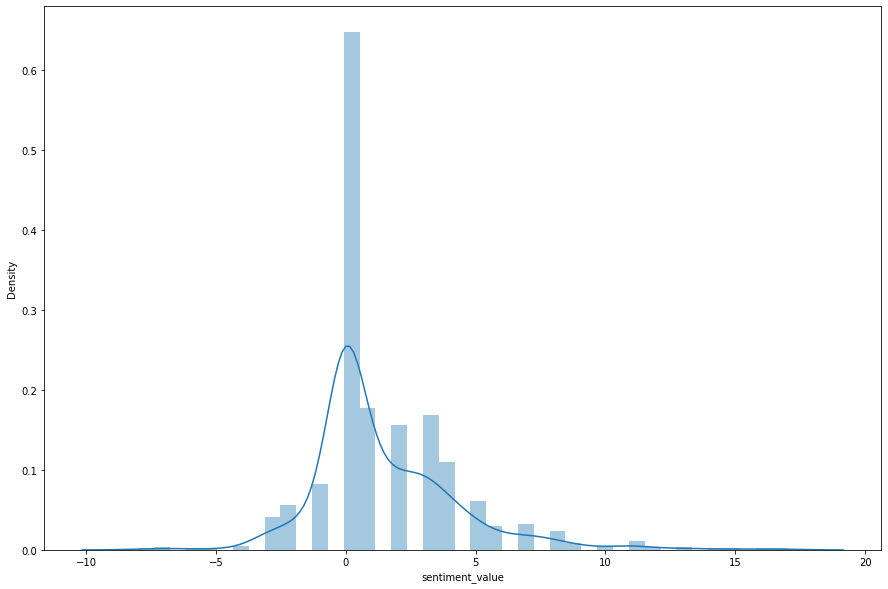

In [96]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])